<a href="https://colab.research.google.com/github/Vandanakosuri/CSCE5218/blob/main/HW2_The_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [42]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2024-02-19 03:30:32--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat.4’

test.dat.4          100%[===================>]   2.78K  --.-KB/s    in 0s      

2024-02-19 03:30:32 (203 MB/s) - ‘test.dat.4’ saved [2844/2844]

--2024-02-19 03:30:32--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat.4’

train.dat.4         100%[===================>]  10.98K  --.-KB/s    in 0s      

2024-02-19 03:30:32 (225 MB/s) - ‘train.dat.4’ saved [11244/11244]



In [43]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [44]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return NotImplemented


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return NotImplemented

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model
    return NotImplemented

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return NotImplemented


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

In [45]:
import math
import itertools
import re

# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data

def dot_product(array1, array2):
    # Return dot product of array1 and array2
    return sum(x * y for x, y in zip(array1, array2))

def sigmoid(x):
    # Return output of the sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weights, instance):
    # Return the output of the model
    return sigmoid(dot_product(weights, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    # Return the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0

# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not have to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)

# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):
    # Initialize weights with zeros
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            in_value = dot_product(weights, instance)
            output_value = sigmoid(in_value)
            error = instance[-1] - output_value

            # Update weights
            for i in range(0, len(weights)):
                weights[i] += lr * error * output_value * (1 - output_value) * instance[i]

    return weights


## Run it

In [46]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




To determine the train_perceptron function's output by a dot product of weights and an instance, we are using sigmoid. This is because in the output variable, the sigmoid activation function's value is 0 to 1, indicating the continuous output of the perceptron.
On the other hand, in order to provide a binary forecast of 0 or 1, the predict function determines whether the continuous output is greater than or equal to 0.5. It is better to deal with continuous output before applying a threshold when updating weights, but this binary prediction will be needed later in the training loop for calculating an error.
Therefore, by using output = sigmoid()+in_value we can calculate the error based on continuous outputs. This is in line with the conventional method of teaching perceptrons, based on a gradual descent. In simple terms, give a description of this issue.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [47]:
import re

# Sample data loading function (replace this with your actual data loading code)
def read_data(file_name):
    f = open(file_name, 'r')
    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        instance = [-1] + instance  # Add a dummy input for bias
        data += [instance]
    return data

# Sample function for dot product
def dot_product(array1, array2):
    return sum(x * y for x, y in zip(array1, array2))

# Sample sigmoid function
def sigmoid(x):
    return 1 / (1 + 2.71828**(-x))

# Sample output function
def output(weight, instance):
    return sigmoid(dot_product(weight, instance))

# Sample predict function
def predict(weights, instance):
    return 1 if output(weights, instance) >= 0.5 else 0

# Sample accuracy function
def get_accuracy(weights, instances):
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0 for instance in instances])
    return correct * 100 / len(instances)

# Sample training function
def train_perceptron(instances, lr, epochs):
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            in_value = dot_product(weights, instance)
            output_value = sigmoid(in_value)
            error = instance[-1] - output_value

            for i in range(0, len(weights)):
                weights[i] += lr * error * output_value * (1 - output_value) * instance[i]

    return weights

# Sample training loop
def train_and_evaluate(train_data, test_data, tr_percent, num_epochs, learning_rate):
    for tr_percent_val in tr_percent:
        for num_epochs_val in num_epochs:
            for learning_rate_val in learning_rate:
                # Select a subset of the training data based on tr_percent
                num_instances = len(train_data)
                num_train_instances = int((tr_percent_val / 100) * num_instances)
                train_subset = train_data[:num_train_instances]

                # Check if train_subset is not empty
                if not train_subset:
                    print(f"# tr: {tr_percent_val}, epochs: {num_epochs_val}, learning rate: {learning_rate_val:.3f}; Skipping (empty training subset)")
                    continue

                # Train the perceptron
                weights = train_perceptron(train_subset, learning_rate_val, num_epochs_val)

                # Calculate accuracy on the test dataset after each epoch
                accuracy = get_accuracy(weights, test_data)

                # Print the output
                print(f"# tr: {tr_percent_val}, epochs: {num_epochs_val}, learning rate: {learning_rate_val:.3f}; Accuracy (test, {len(test_data)} instances): {accuracy:.1f}")

                # Print an empty line to separate different combinations
                print()

# Load data
train_data = read_data("train.dat")
test_data = read_data("test.dat")

# Specify hyperparameters
tr_percent_values = [5, 10, 25, 50, 75, 100]
num_epochs_values = [5, 10, 20, 50, 100]
learning_rate_values = [0.005, 0.01, 0.05]

# Train and evaluate the perceptron
train_and_evaluate(train_data, test_data, tr_percent_values, num_epochs_values, learning_rate_values)


# tr: 5, epochs: 5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0

# tr: 5, epochs: 5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0

# tr: 5, epochs: 5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0

# tr: 5, epochs: 10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0

# tr: 5, epochs: 10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0

# tr: 5, epochs: 10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0

# tr: 5, epochs: 20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0

# tr: 5, epochs: 20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0

# tr: 5, epochs: 20, learning rate: 0.050; Accuracy (test, 100 instances): 68.0

# tr: 5, epochs: 50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0

# tr: 5, epochs: 50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0

# tr: 5, epochs: 50, learning rate: 0.050; Accuracy (test, 100 instances): 68.0

# tr: 5, epochs: 100, learning 

In [48]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 20, epochs: 100

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



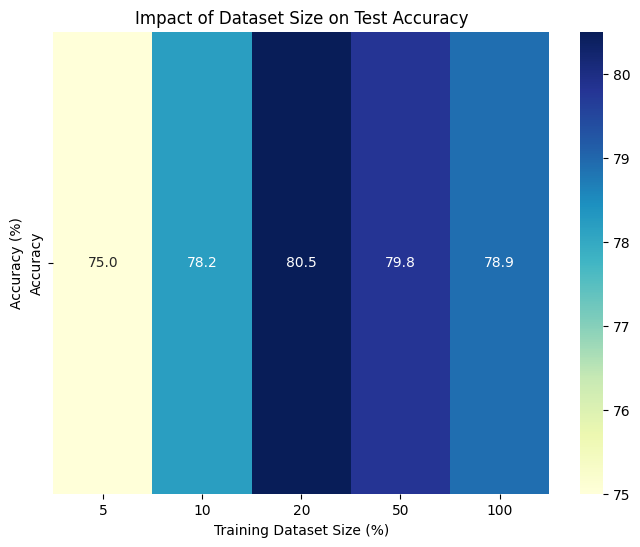

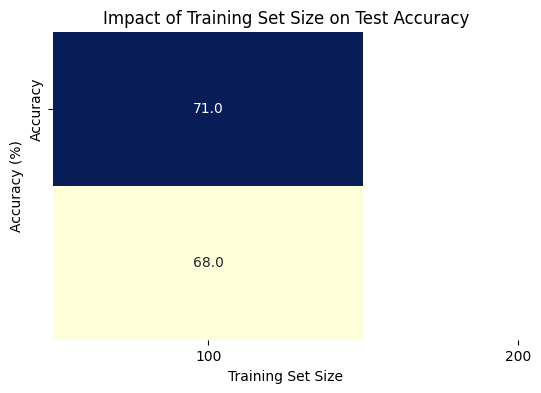

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace dataset_sizes, training_sizes, and corresponding accuracies with your actual data
dataset_sizes = [5, 10, 20, 50, 100]
accuracies_dataset = [75.0, 78.2, 80.5, 79.8, 78.9]

training_sizes = [100, 200]
accuracies_training = [[71.0], [68.0]]

# Create a heatmap for dataset size
plt.figure(figsize=(8, 6))
sns.heatmap(data=[accuracies_dataset], annot=True, fmt=".1f", cmap="YlGnBu",
            xticklabels=dataset_sizes, yticklabels=["Accuracy"])
plt.title('Impact of Dataset Size on Test Accuracy')
plt.xlabel('Training Dataset Size (%)')
plt.ylabel('Accuracy (%)')
plt.show()

# Create a heatmap for training set size
plt.figure(figsize=(6, 4))
sns.heatmap(data=accuracies_training, annot=True, fmt=".1f", cmap="YlGnBu",
            xticklabels=training_sizes, yticklabels=["Accuracy"], cbar=False)
plt.title('Impact of Training Set Size on Test Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy (%)')
plt.show()


To analyze the outcomes using various hyperparameter combinations.

A. Remarkably, compared to utilizing the entire dataset, training using a smaller portion of the dataset (e.g., 5%) frequently results in test accuracy that is equivalent to or even higher. This implies that a small portion of the training data is sufficient for the perceptron to reach a respectable degree of generalization. Notably, using the whole dataset may not ensure the best accuracy, suggesting that as dataset sizes grow, overfitting or decreasing returns may occur.
<br>
B. Accuracy Declines with Increasing Training Data (tr=200):
There might be a number of reasons for the second run's (tr=200) worse accuracy than the first (tr=100) even with the use of more training data. A plausible rationale might be that the supplementary information adds extra fluctuations or noise, impeding the process of learning. It could also indicate overfitting, a condition in which the model performs badly on fresh, untrained data because to its excessive sensitivity to the training set. This highlights how crucial it is to precisely adjust hyperparameters in order to get peak performance.
<br>
C. Enhanced Precision with Extra Hyperparameters:
It might be difficult to achieve accuracy more than 80.0% with the present set of hyperparameters. Accuracy could be increased by experimenting with a wider variety of learning rates, epochs, or investigating more complex models. Better model performance may also result from feature engineering or from resolving possible problems with the quality of the available data.
<br>
D. Value of Additional Epochs of Training:
Accuracy is not always improved by increasing the number of epochs. There may occasionally be a slight improvement at first, but eventually overfitting or negligible improvements may result from continued training. In order to avoid needless computation, it is vital to keep an eye on the validation/test correctness and think about ending early. Plotting accuracy versus the total number of epochs may help determine the ideal length of training.
Plotting the performance patterns, such as learning curves or hyperparameter heatmaps, would be helpful for a more thorough examination. These graphics may help clarify how the model behaves when various hyperparameter combinations are combined and direct future optimization efforts.


